In [35]:
#Here I import modüle what I need 
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Housing Price Prediction Data
- https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data

In [36]:
df= pd.read_csv("housing_price_dataset.csv")
#Pandas library to read data from a CSV (Comma-Separated Values) file into a Pandas DataFrame.


In [37]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [38]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [40]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [41]:
cdf = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
        'Price']]

In [42]:
cdf.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


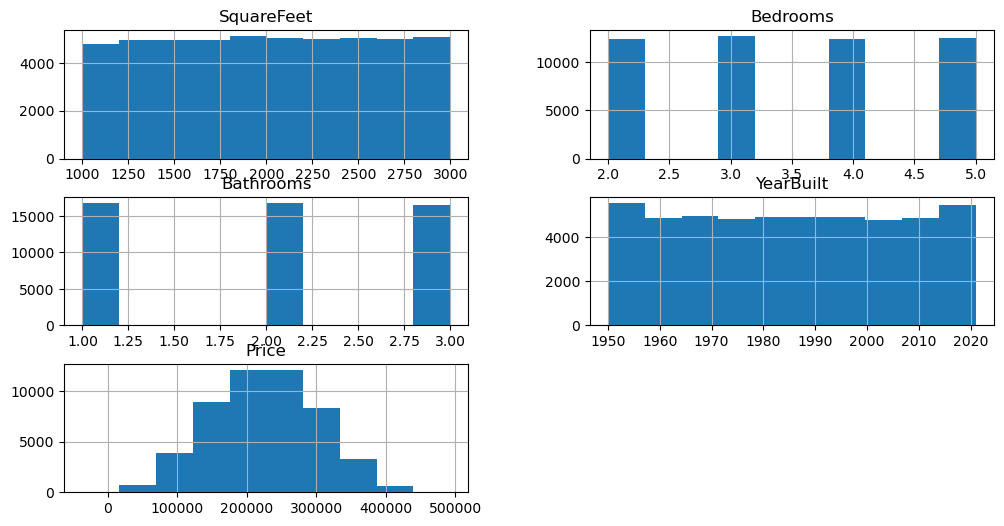

In [43]:
# the default figure size for matplotlib plots, selects specific columns from the DataFrame cdf, creates histograms for those columns, and then displays the histograms using plt.show().
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
        'Price']]
viz.hist()
plt.show()

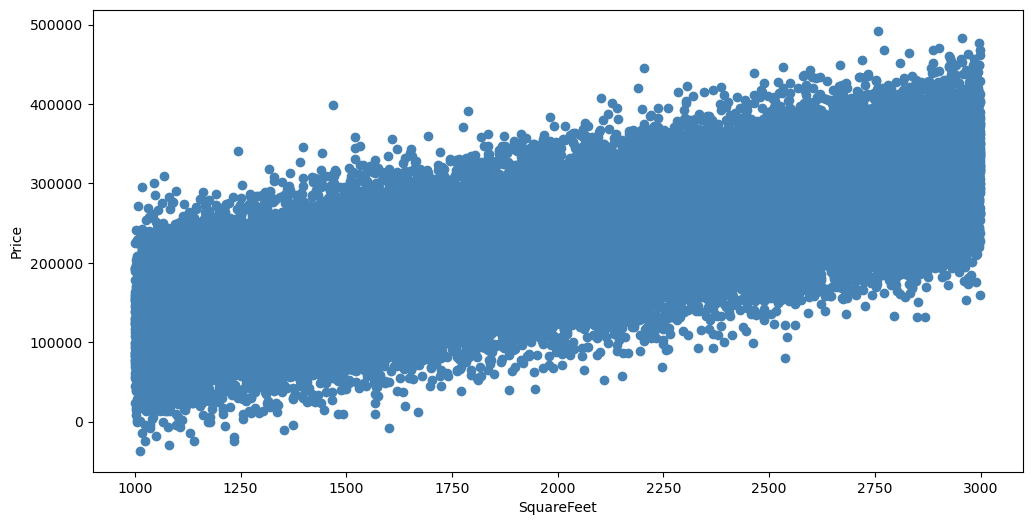

In [44]:
#creates a scatter plot with SquareFeet on the x-axis and Price on the y-axis using data from the DataFrame cdf, visualizing the relationship between these two variables.
plt.scatter(cdf.SquareFeet, cdf.Price, color="steelblue")
plt.xlabel("SquareFeet")
plt.ylabel("Price")
plt.show()

<Axes: xlabel='SquareFeet', ylabel='Price'>

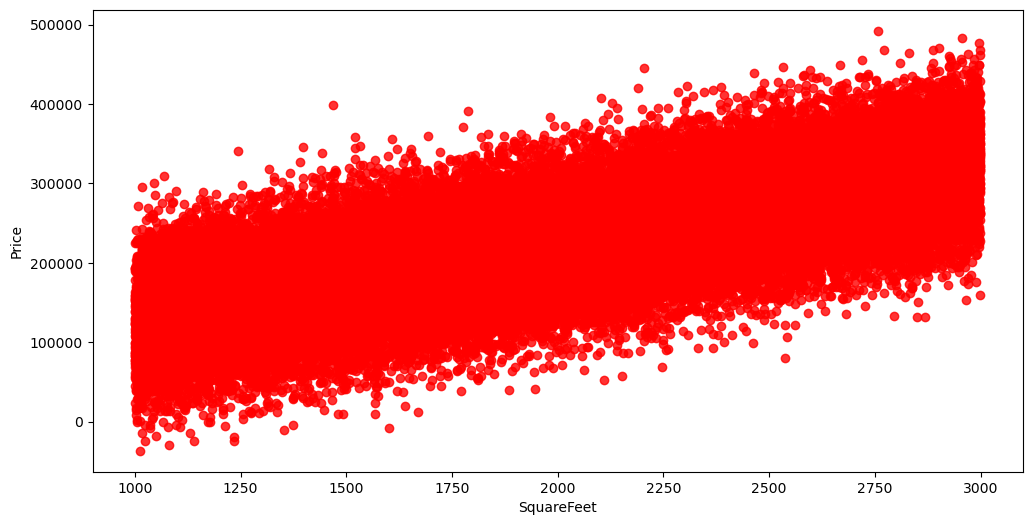

In [45]:
import seaborn as sns

sns.regplot(x=df['SquareFeet'], y=df['Price'] ,color="red")

In [46]:
# randomly splits the DataFrame cdf into training and testing sets, with approximately 80% of the data assigned to the training set (train) and the remaining 20% to the testing set (test).
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

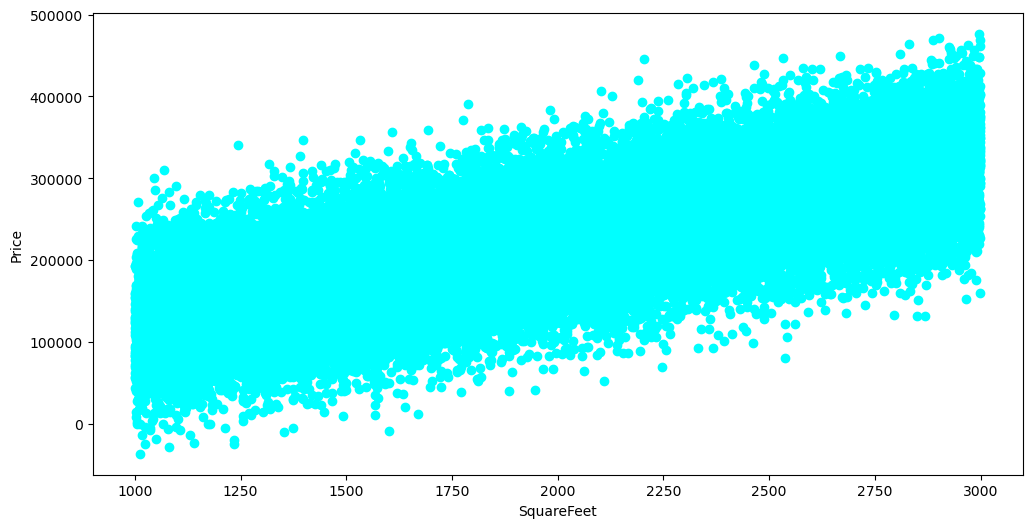

In [47]:
plt.scatter(train.SquareFeet, train.Price, color="cyan")
plt.xlabel("SquareFeet")
plt.ylabel("Price")
plt.show()

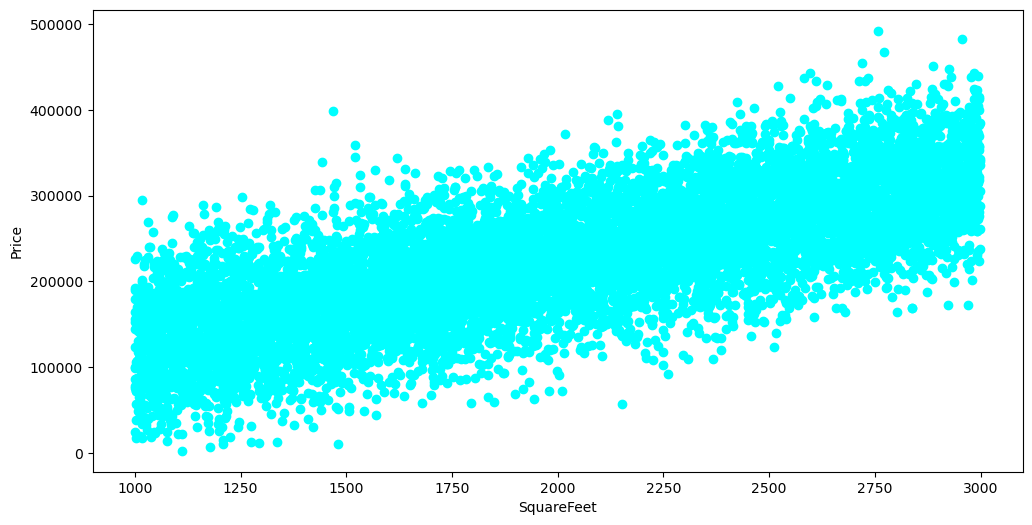

In [48]:
plt.scatter(test.SquareFeet, test.Price, color="cyan")
plt.xlabel("SquareFeet")
plt.ylabel("Price")

plt.show()

In [49]:
#uses the scikit-learn library to create a linear regression model (regr) and fits it to the training data, where train_x represents the input feature (SquareFeet) and train_y represents the target variable (Price).
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['SquareFeet']])
train_y = np.asanyarray(train[['Price']])

regr.fit(train_x, train_y)

LinearRegression()

# Model evaluation metrics:
- Mean Absolute Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [50]:
print(regr.coef_)
print(regr.intercept_)

[[99.23113496]]
[25563.49117394]


In [51]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['SquareFeet']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

In [52]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 40259.18
Residual sum of squares (MSE): 2526644212.59
R2-score: 0.57


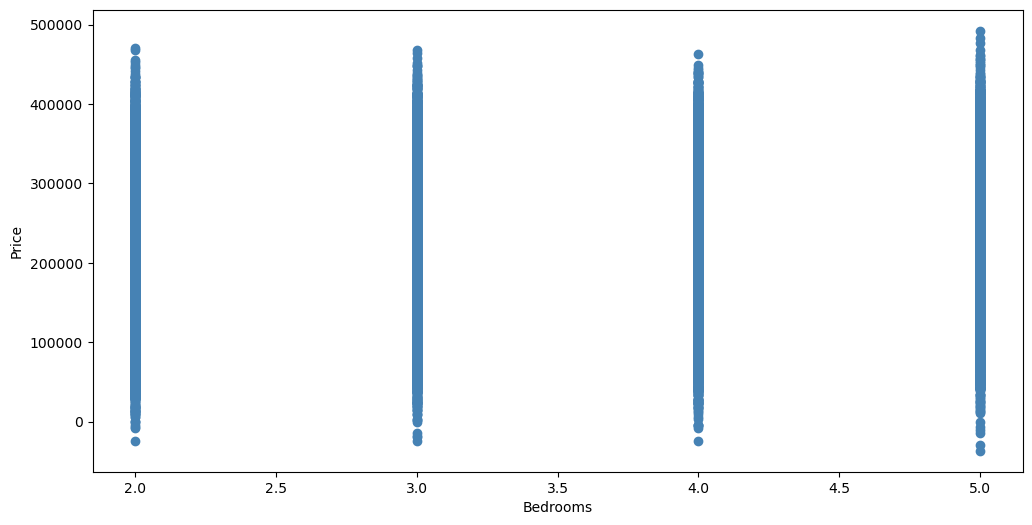

In [53]:
plt.scatter(cdf.Bedrooms, cdf.Price, color="steelblue")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


<Axes: xlabel='Bedrooms', ylabel='Price'>

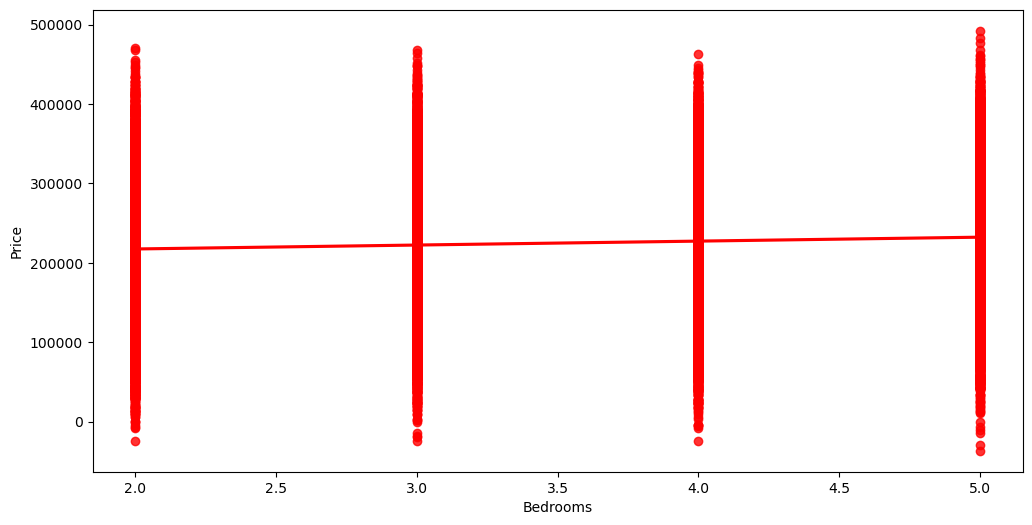

In [54]:
import seaborn as sns

sns.regplot(x=df['Bedrooms'], y=df['Price'] ,color="red")

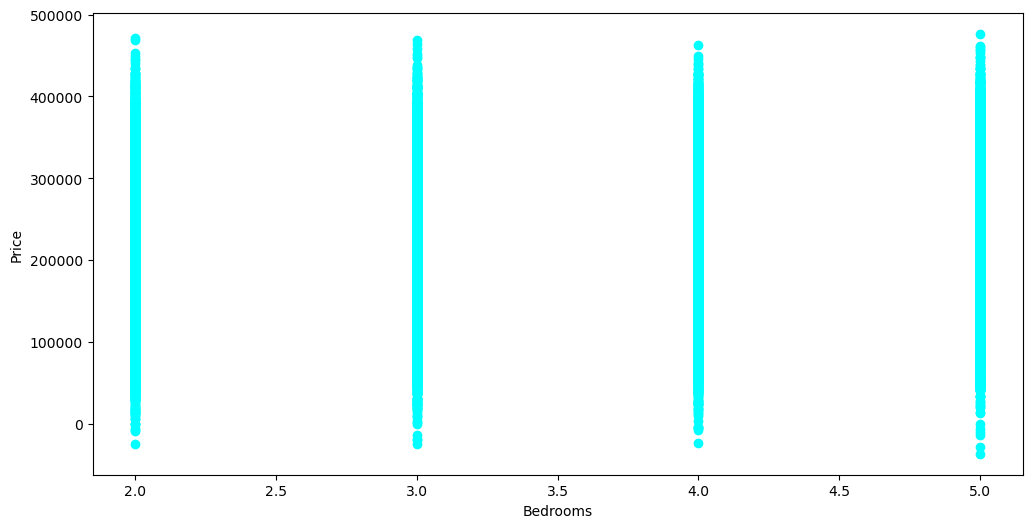

In [55]:
plt.scatter(train.Bedrooms, train.Price, color="cyan")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

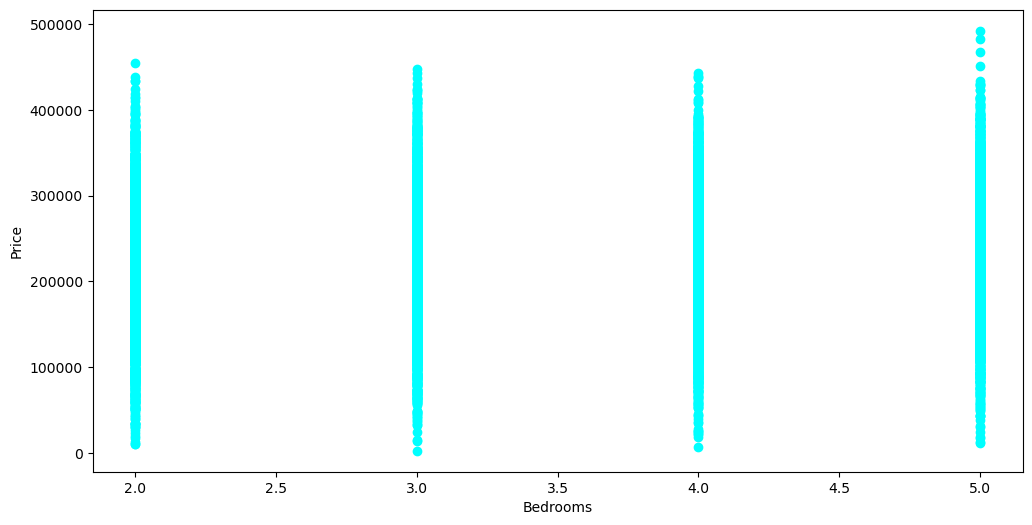

In [56]:
plt.scatter(test.Bedrooms, test.Price, color="cyan")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

plt.show()

In [57]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Bedrooms']])
train_y = np.asanyarray(train[['Price']])

regr.fit(train_x, train_y)

LinearRegression()

In [58]:
print(regr.coef_)
print(regr.intercept_)

[[4686.82935686]]
[208194.98626799]


In [59]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Bedrooms']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

In [60]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 62159.69
Residual sum of squares (MSE): 5785140034.60
R2-score: 0.01
